In [10]:
import pandas as pd

import seaborn as sns

In [11]:
import seaborn as sn

In [75]:
data = pd.read_csv("F:\\builded_spark\\train.csv")

In [76]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [77]:
len(data.columns)

12

In [78]:
data.drop(columns='Name',inplace=True)


In [79]:
data.drop(columns='Cabin',inplace=True)

In [80]:
def string_to_digits(s):
    result = ''.join([i for i in str(s) if not i.isdigit()])
    if result =='':
        return 'null'
    return result

In [81]:
data['Ticket_to_digit']=data['Ticket'].apply(string_to_digits)

In [82]:
data.drop(columns='Ticket',inplace=True)

In [83]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [84]:
data['Sex_1']=le.fit_transform(data['Sex'])

In [85]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1
0,1,0,3,male,22.0,1,0,7.2500,S,A/,1
1,2,1,1,female,38.0,1,0,71.2833,C,PC,0
2,3,1,3,female,26.0,0,0,7.9250,S,STON/O.,0
3,4,1,1,female,35.0,1,0,53.1000,S,null,0
4,5,0,3,male,35.0,0,0,8.0500,S,null,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,null,1
887,888,1,1,female,19.0,0,0,30.0000,S,null,0
888,889,0,3,female,NaN,1,2,23.4500,S,W./C.,0
889,890,1,1,male,26.0,0,0,30.0000,C,null,1


In [86]:
data.drop(columns='Sex',inplace=True)

In [87]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1
0,1,0,3,22.0,1,0,7.2500,S,A/,1
1,2,1,1,38.0,1,0,71.2833,C,PC,0
2,3,1,3,26.0,0,0,7.9250,S,STON/O.,0
3,4,1,1,35.0,1,0,53.1000,S,null,0
4,5,0,3,35.0,0,0,8.0500,S,null,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,null,1
887,888,1,1,19.0,0,0,30.0000,S,null,0
888,889,0,3,NaN,1,2,23.4500,S,W./C.,0
889,890,1,1,26.0,0,0,30.0000,C,null,1


In [88]:
#performing one hot operation withe the Pclass
data=pd.concat([data,pd.get_dummies(data['Pclass']).iloc[:,:2]],axis='columns')

In [89]:
#Renaming the Pclass column
data.rename({1: "Pclass_0", 2: "Pclass_1"},axis='columns',inplace=True)

In [90]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1
0,1,0,3,22.0,1,0,7.2500,S,A/,1,0,0
1,2,1,1,38.0,1,0,71.2833,C,PC,0,1,0
2,3,1,3,26.0,0,0,7.9250,S,STON/O.,0,0,0
3,4,1,1,35.0,1,0,53.1000,S,null,0,1,0
4,5,0,3,35.0,0,0,8.0500,S,null,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,null,1,0,1
887,888,1,1,19.0,0,0,30.0000,S,null,0,1,0
888,889,0,3,NaN,1,2,23.4500,S,W./C.,0,0,0
889,890,1,1,26.0,0,0,30.0000,C,null,1,1,0


In [91]:
data.drop(columns='Pclass',inplace=True)

In [92]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1
0,1,0,22.0,1,0,7.2500,S,A/,1,0,0
1,2,1,38.0,1,0,71.2833,C,PC,0,1,0
2,3,1,26.0,0,0,7.9250,S,STON/O.,0,0,0
3,4,1,35.0,1,0,53.1000,S,null,0,1,0
4,5,0,35.0,0,0,8.0500,S,null,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,S,null,1,0,1
887,888,1,19.0,0,0,30.0000,S,null,0,1,0
888,889,0,NaN,1,2,23.4500,S,W./C.,0,0,0
889,890,1,26.0,0,0,30.0000,C,null,1,1,0


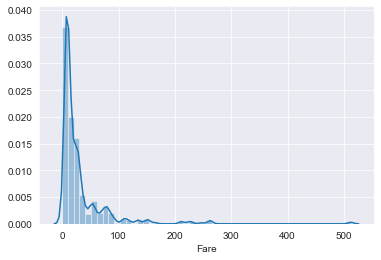

In [93]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data['Fare'])



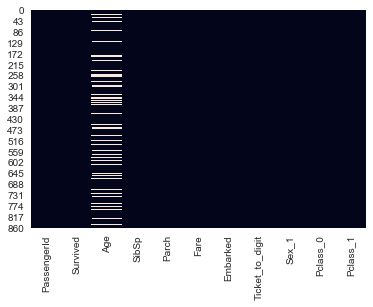

In [94]:
sns.heatmap(data.isnull(), cbar=False)

In [95]:
def age_grp(value):
    if value<=10:
        return 1
    elif value<=20:
        return 2
    elif value<=30:
        return 3
    elif value<=40:
        return 4
    elif value<=50:
        return 5
    elif value<=60:
        return 6
    elif value<=70:
        return 7
    elif value<=80:
        return 8
    elif value<=90:
        return 9
    elif value<=100:
        return 10
    

In [106]:
data['Age_dummy']=data['Age'].apply(age_grp)

In [107]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_dummy
0,1,0,22.0,1,0,7.2500,S,A/,1,0,0,3.0
1,2,1,38.0,1,0,71.2833,C,PC,0,1,0,4.0
2,3,1,26.0,0,0,7.9250,S,STON/O.,0,0,0,3.0
3,4,1,35.0,1,0,53.1000,S,null,0,1,0,4.0
4,5,0,35.0,0,0,8.0500,S,null,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,S,null,1,0,1,3.0
887,888,1,19.0,0,0,30.0000,S,null,0,1,0,2.0
888,889,0,NaN,1,2,23.4500,S,W./C.,0,0,0,NaN
889,890,1,26.0,0,0,30.0000,C,null,1,1,0,3.0


In [109]:
data['Age_dummy'].mode()

0    3.0
dtype: float64

In [39]:
import numpy as np
from sklearn.impute import SimpleImputer

In [55]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [110]:
data['Age_dummy']=pd.DataFrame(imp_mean.fit_transform(data['Age_dummy'].values.reshape(-1, 1)))

In [111]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_dummy
0,1,0,22.0,1,0,7.2500,S,A/,1,0,0,3.0
1,2,1,38.0,1,0,71.2833,C,PC,0,1,0,4.0
2,3,1,26.0,0,0,7.9250,S,STON/O.,0,0,0,3.0
3,4,1,35.0,1,0,53.1000,S,null,0,1,0,4.0
4,5,0,35.0,0,0,8.0500,S,null,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,S,null,1,0,1,3.0
887,888,1,19.0,0,0,30.0000,S,null,0,1,0,2.0
888,889,0,NaN,1,2,23.4500,S,W./C.,0,0,0,3.0
889,890,1,26.0,0,0,30.0000,C,null,1,1,0,3.0


In [113]:
dummies= pd.get_dummies(data['Age_dummy'])
dummies.rename({1.0: "Age_1", 2.0: "Age_2", 3.0: "Age_3", 4.0: "Age_4", 5.0: "Age_5", 6.0: "Age_6", 7.0: "Age_7", 8.0: "Age_8"},axis='columns',inplace=True)
dummies.iloc[:,:7]

,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0
887,0,1,0,0,0,0,0
888,0,0,1,0,0,0,0
889,0,0,1,0,0,0,0


In [114]:
data = pd.concat([data,dummies.iloc[:,:7]],axis='columns')

In [116]:
data

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_dummy,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7
0,1,0,22.0,1,0,7.2500,S,A/,1,0,0,3.0,0,0,1,0,0,0,0
1,2,1,38.0,1,0,71.2833,C,PC,0,1,0,4.0,0,0,0,1,0,0,0
2,3,1,26.0,0,0,7.9250,S,STON/O.,0,0,0,3.0,0,0,1,0,0,0,0
3,4,1,35.0,1,0,53.1000,S,null,0,1,0,4.0,0,0,0,1,0,0,0
4,5,0,35.0,0,0,8.0500,S,null,1,0,0,4.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,S,null,1,0,1,3.0,0,0,1,0,0,0,0
887,888,1,19.0,0,0,30.0000,S,null,0,1,0,2.0,0,1,0,0,0,0,0
888,889,0,NaN,1,2,23.4500,S,W./C.,0,0,0,3.0,0,0,1,0,0,0,0
889,890,1,26.0,0,0,30.0000,C,null,1,1,0,3.0,0,0,1,0,0,0,0


In [120]:
data.drop(columns=['Age_dummy','Age'],inplace=True)

In [122]:
data

,PassengerId,Survived,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7
0,1,0,1,0,7.2500,S,A/,1,0,0,0,0,1,0,0,0,0
1,2,1,1,0,71.2833,C,PC,0,1,0,0,0,0,1,0,0,0
2,3,1,0,0,7.9250,S,STON/O.,0,0,0,0,0,1,0,0,0,0
3,4,1,1,0,53.1000,S,null,0,1,0,0,0,0,1,0,0,0
4,5,0,0,0,8.0500,S,null,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,13.0000,S,null,1,0,1,0,0,1,0,0,0,0
887,888,1,0,0,30.0000,S,null,0,1,0,0,1,0,0,0,0,0
888,889,0,1,2,23.4500,S,W./C.,0,0,0,0,0,1,0,0,0,0
889,890,1,0,0,30.0000,C,null,1,1,0,0,0,1,0,0,0,0


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data['Fare'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
data['Fare_1']=scaler.transform(data['Fare'].values.reshape(-1,1))

In [131]:
data

,PassengerId,Survived,SibSp,Parch,Fare,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Fare_1
0,1,0,1,0,7.2500,S,A/,1,0,0,0,0,1,0,0,0,0,-0.502445
1,2,1,1,0,71.2833,C,PC,0,1,0,0,0,0,1,0,0,0,0.786845
2,3,1,0,0,7.9250,S,STON/O.,0,0,0,0,0,1,0,0,0,0,-0.488854
3,4,1,1,0,53.1000,S,null,0,1,0,0,0,0,1,0,0,0,0.420730
4,5,0,0,0,8.0500,S,null,1,0,0,0,0,0,1,0,0,0,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,13.0000,S,null,1,0,1,0,0,1,0,0,0,0,-0.386671
887,888,1,0,0,30.0000,S,null,0,1,0,0,1,0,0,0,0,0,-0.044381
888,889,0,1,2,23.4500,S,W./C.,0,0,0,0,0,1,0,0,0,0,-0.176263
889,890,1,0,0,30.0000,C,null,1,1,0,0,0,1,0,0,0,0,-0.044381


In [132]:
data.drop(columns=['Fare'],inplace=True)

In [133]:
data

,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Fare_1
0,1,0,1,0,S,A/,1,0,0,0,0,1,0,0,0,0,-0.502445
1,2,1,1,0,C,PC,0,1,0,0,0,0,1,0,0,0,0.786845
2,3,1,0,0,S,STON/O.,0,0,0,0,0,1,0,0,0,0,-0.488854
3,4,1,1,0,S,null,0,1,0,0,0,0,1,0,0,0,0.420730
4,5,0,0,0,S,null,1,0,0,0,0,0,1,0,0,0,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,S,null,1,0,1,0,0,1,0,0,0,0,-0.386671
887,888,1,0,0,S,null,0,1,0,0,1,0,0,0,0,0,-0.044381
888,889,0,1,2,S,W./C.,0,0,0,0,0,1,0,0,0,0,-0.176263
889,890,1,0,0,C,null,1,1,0,0,0,1,0,0,0,0,-0.044381


In [134]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [135]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [136]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [143]:
dummies= pd.get_dummies(data['SibSp'])
dummies.rename({0: "SibSp_1", 1.0: "SibSp_2", 2.0: "SibSp_3", 3.0: "SibSp_4", 4.0: "SibSp_5", 5.0: "SibSp_6", 8: "SibSp_7"},axis='columns',inplace=True)
dummies.iloc[:,:6]

,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_6
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
886,1,0,0,0,0,0
887,1,0,0,0,0,0
888,0,1,0,0,0,0
889,1,0,0,0,0,0


In [145]:
data=pd.concat([data,dummies.iloc[:,:6]],axis='columns')

In [147]:
data

,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,Age_5,Age_6,Age_7,Fare_1,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_6
0,1,0,1,0,S,A/,1,0,0,0,...,0,0,0,-0.502445,0,1,0,0,0,0
1,2,1,1,0,C,PC,0,1,0,0,...,0,0,0,0.786845,0,1,0,0,0,0
2,3,1,0,0,S,STON/O.,0,0,0,0,...,0,0,0,-0.488854,1,0,0,0,0,0
3,4,1,1,0,S,null,0,1,0,0,...,0,0,0,0.420730,0,1,0,0,0,0
4,5,0,0,0,S,null,1,0,0,0,...,0,0,0,-0.486337,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,S,null,1,0,1,0,...,0,0,0,-0.386671,1,0,0,0,0,0
887,888,1,0,0,S,null,0,1,0,0,...,0,0,0,-0.044381,1,0,0,0,0,0
888,889,0,1,2,S,W./C.,0,0,0,0,...,0,0,0,-0.176263,0,1,0,0,0,0
889,890,1,0,0,C,null,1,1,0,0,...,0,0,0,-0.044381,1,0,0,0,0,0


In [161]:
dummies= pd.get_dummies(data['Parch'])
dummies.rename({0: "parch_1", 1.0: "parch_2", 2.0: "parch_3", 3.0: "parch_4", 4.0: "parch_5", 5.0: "parch_6", 6: "parch_7"},axis='columns',inplace=True)
dummies.iloc[:,:6]

,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
886,1,0,0,0,0,0
887,1,0,0,0,0,0
888,0,0,1,0,0,0
889,1,0,0,0,0,0


In [162]:
data=pd.concat([data,dummies.iloc[:,:6]],axis='columns')

In [222]:
datacop=data.copy()

In [192]:
datacop

,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0,1,0,S,A/,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,0,C,PC,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,S,STON/O.,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,0,S,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,S,null,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,S,null,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
887,888,1,0,0,S,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
888,889,0,1,2,S,W./C.,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
889,890,1,0,0,C,null,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [223]:
datacop[datacop['Embarked'].isnull()]


,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
61,62,1,0,0,NaN,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
829,830,1,0,0,NaN,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [224]:
datacop[datacop['Embarked'].isnull()]


,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
61,62,1,0,0,NaN,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
829,830,1,0,0,NaN,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [225]:
datacop.drop(datacop.index[[829,61]],inplace=True)

In [227]:
datacop[datacop['Embarked'].isnull()]


,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6


,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0,1,0,S,A/,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,0,C,PC,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,S,STON/O.,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,1,0,S,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,S,null,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,S,null,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
887,888,1,0,0,S,null,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
888,889,0,1,2,S,W./C.,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
889,890,1,0,0,C,null,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [233]:
datacop.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [240]:
dummies=pd.get_dummies(datacop.Embarked)
dummies.rename({'C':'Embark1','Q':'Embark2','S':'Embark3'},axis='columns',inplace=True)
dummies.iloc[:,:2]

,Embark1,Embark2
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
886,0,0
887,0,0
888,0,0
889,1,0


In [242]:
datacop=pd.concat([datacop,dummies.iloc[:,:2]],axis='columns')

In [243]:
datacop

,PassengerId,Survived,SibSp,Parch,Embarked,Ticket_to_digit,Sex_1,Pclass_0,Pclass_1,Age_1,...,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,Embark1,Embark2
0,1,0,1,0,S,A/,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,1,0,C,PC,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,1,0,0,S,STON/O.,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,S,null,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,S,null,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,S,null,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
887,888,1,0,0,S,null,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
888,889,0,1,2,S,W./C.,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,890,1,0,0,C,null,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [254]:
datacop.drop(columns=['SibSp','Parch','Embarked','Ticket_to_digit'],inplace=True)

In [258]:
datacop

,PassengerId,Survived,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,...,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,Embark1,Embark2
0,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,3,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
887,888,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
888,889,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
889,890,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [363]:
datacop.drop(columns=['PassengerId'],inplace=True)

In [364]:
datacop

,Survived,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
887,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
888,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [262]:
len(datacop.columns)

26

In [260]:
check_duplicate=datacop.T

In [261]:
check_duplicate.duplicated()

Survived    False
Sex_1       False
Pclass_0    False
Pclass_1    False
Age_1       False
Age_2       False
Age_3       False
Age_4       False
Age_5       False
Age_6       False
Age_7       False
Fare_1      False
SibSp_1     False
SibSp_2     False
SibSp_3     False
SibSp_4     False
SibSp_5     False
SibSp_6     False
parch_1     False
parch_2     False
parch_3     False
parch_4     False
parch_5     False
parch_6     False
Embark1     False
Embark2     False
dtype: bool

In [ ]:
#should not Drop the age
datacop=datacop.drop(columns=['Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7'])
datacop=datacop.drop(columns=['Survived'])
datacop
################################################################################################

In [362]:
datacop

,PassengerId,Survived,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
887,888,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
888,889,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
889,890,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [366]:
#Dropping the Fare

datacop=datacop.drop(columns='Fare_1',errors='ignore')
datacop

,Survived,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
887,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
888,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [367]:
datacop.drop(columns='Survived',errors='ignore')

,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,...,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
887,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
888,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [370]:
datacop.drop(datacop.index[[829,61]],inplace=True)

In [371]:
X=datacop.drop(columns='Survived',errors='ignore').values
X.shape

(889, 22)

In [350]:
y=datacop.Survived.values
y.shape

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [268]:
datacop.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

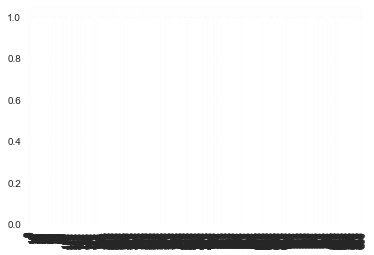

In [269]:
datacop.Survived.plot(kind='bar')

In [365]:
datacop.columns

Index(['Survived', 'Sex_1', 'Pclass_0', 'Pclass_1', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Fare_1', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_6', 'parch_1', 'parch_2',
       'parch_3', 'parch_4', 'parch_5', 'parch_6'],
      dtype='object')

,Sex_1,Pclass_0,Pclass_1,Fare_1,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,Embark1,Embark2
0,1,0,0,-0.502445,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0.786845,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,-0.488854,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0.420730,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,-0.486337,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,-0.386671,1,0,0,0,0,0,1,0,0,0,0,0,0,0
887,0,1,0,-0.044381,1,0,0,0,0,0,1,0,0,0,0,0,0,0
888,0,0,0,-0.176263,0,1,0,0,0,0,0,0,1,0,0,0,0,0
889,1,1,0,-0.044381,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [373]:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


c:\users\tamilselvan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [374]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [375]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
score =accuracy_score(y_test,y_pred)
score

0.8163265306122449

In [376]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [377]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [378]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
score =accuracy_score(y_test,y_pred)
score

0.826530612244898

In [291]:
X=datacop.drop(columns='Survived')
X

,Sex_1,Pclass_0,Pclass_1,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,...,SibSp_5,SibSp_6,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,Embark1,Embark2
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
887,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
888,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [309]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [310]:
model.fit(X_train, y_train)


c:\users\tamilselvan\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [311]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
score =accuracy_score(y_test,y_pred)
score

0.7857142857142857

In [314]:
model.feature_importances_

array([2.50523010e-01, 5.27419928e-02, 4.39138538e-02, 2.80942376e-02,
       1.93489227e-02, 2.26069615e-02, 2.17186587e-02, 1.60493855e-02,
       1.02250870e-02, 6.91124712e-03, 3.40632665e-01, 1.70181084e-02,
       2.16080707e-02, 3.80292350e-03, 8.01746293e-03, 4.91227107e-03,
       1.57574982e-04, 2.14484821e-02, 1.89017949e-02, 1.17676791e-02,
       3.23511109e-03, 5.03714063e-03, 5.78411450e-04, 4.38749174e-02,
       2.68740297e-02])

In [323]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [325]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [326]:
roc_value

0.8254940711462451

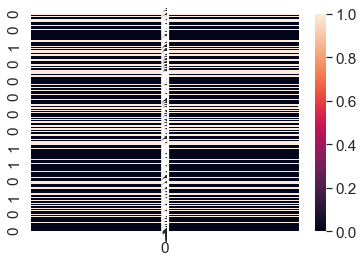

In [327]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(y_pred, y_test)
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [330]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix


Confusion matrix, without normalization
[[161  23]
 [ 31  79]]


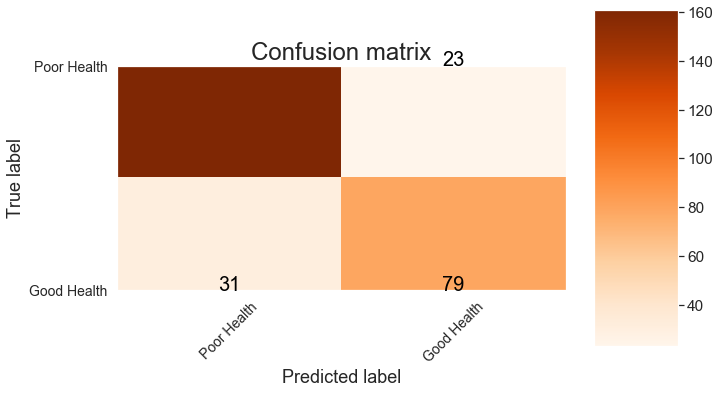

In [334]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'])



In [338]:
cm

array([[161,  23],
       [ 31,  79]], dtype=int64)

In [ ]:
cm.